In [ ]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
import teotil3 as teo

plt.style.use("ggplot")

In [3]:
# Connect to JupyterHub's PostGIS database
eng = nivapy.da.connect_postgis()

Connection successful.


# Task 2.15: Testing, documentation and reporting

## Part J: Sæbyvannet

Sæbyvannet is a small lake in the Morsa catchment with very good monitoring data.

In [4]:
nve_data_year = 2023
admin_year = 2022

In [5]:
# Get regines
reg_gdf = teo.io.get_regine_geodataframe(eng, admin_year)

# Read single input file and build network
data_fold = r"/home/jovyan/shared/common/teotil3/annual_input_data"
csv_path = os.path.join(
    data_fold,
    f"teotil3_input_data_nve{nve_data_year}_2013.csv",
)
in_df = pd.read_csv(csv_path)
g = teo.model.build_graph(in_df, id_col="regine", next_down_col="regine_down")

# Read model results
eval_fold = r"/home/jovyan/shared/common/teotil3/evaluation"
mod_csv = os.path.join(eval_fold, f"teo3_results_nve{nve_data_year}_2013-2022.csv")
mod_df = pd.read_csv(mod_csv)

mod_df.head()

,regine,regine_down,accum_agriculture-background_din_kg,accum_agriculture-background_ss_kg,accum_agriculture-background_tdp_kg,accum_agriculture-background_toc_kg,accum_agriculture-background_ton_kg,accum_agriculture-background_totn_kg,accum_agriculture-background_totp_kg,accum_agriculture-background_tpp_kg,...,local_urban_tpp_kg,local_wood_din_kg,local_wood_ss_kg,local_wood_tdp_kg,local_wood_toc_kg,local_wood_ton_kg,local_wood_totn_kg,local_wood_totp_kg,local_wood_tpp_kg,year
0,001.10,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,36.1,849.2,0.6,9938.9,186.2,222.3,5.4,4.8,2013
1,001.1A2B,001.1A2A,123.574401,0.752367,3.420677,6341.957239,68.505729,192.080130,3.609359,0.188682,...,5.6,1318.1,29798.4,23.9,384175.8,7138.8,8456.9,210.0,186.1,2013
2,001.1A4D,001.1A4C,15.917595,0.289332,0.117126,464.712746,6.729665,22.647261,0.149627,0.032501,...,0.0,237.2,5272.5,4.3,70016.3,1296.4,1533.6,38.2,33.9,2013
3,001.1M,001.1L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,473.5,11104.0,8.8,142788.5,2641.6,3115.1,78.3,69.5,2013
4,001.21,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,5.0,117.0,0.1,1386.1,25.9,30.9,0.8,0.7,2013


Selected regine:	003.B1B.
Selected parameter:	TOTP.
Time period:		2017 to 2022.
Concentration for GES:	16 ug/l.

The regine contains 1 lake(s):
	vatnLnrs:	[295]

Estimated mean outflow concentration(s) (2017-2022):
	TOTP (ug/l)                         28.3
	TDP (ug/l)                           9.6
	TPP (ug/l)                          18.6

Estimated mean annual outflow flux(es) (2017-2022):
	TOTP (kg)                           1437
	TDP (kg)                             492
	TPP (kg)                             945

Source apportionment for outflow TOTP:
	Agriculture (%)                     75.3
	Wood (%)                            15.1
	Agriculture-background (%)           4.8
	Urban (%)                            2.6
	Spredt (%)                           1.6
	Large-wastewater (%)                 0.4
	Upland (%)                           0.3

Maximum outflow flux for GES (kg/yr)	     841
Transmission factor (weighted) for TOTP     0.52
Maximum inflow flux for GES (kg/yr)	    1607
Estim

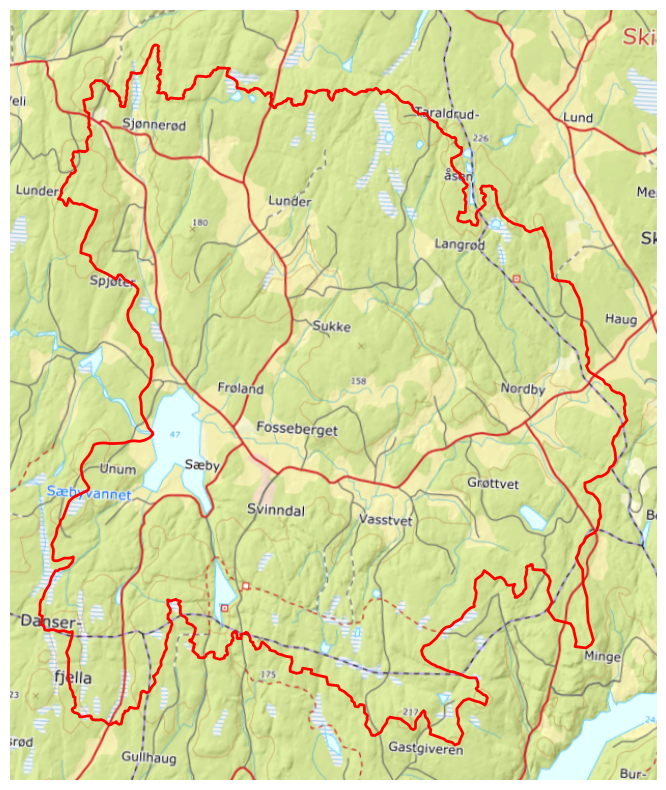

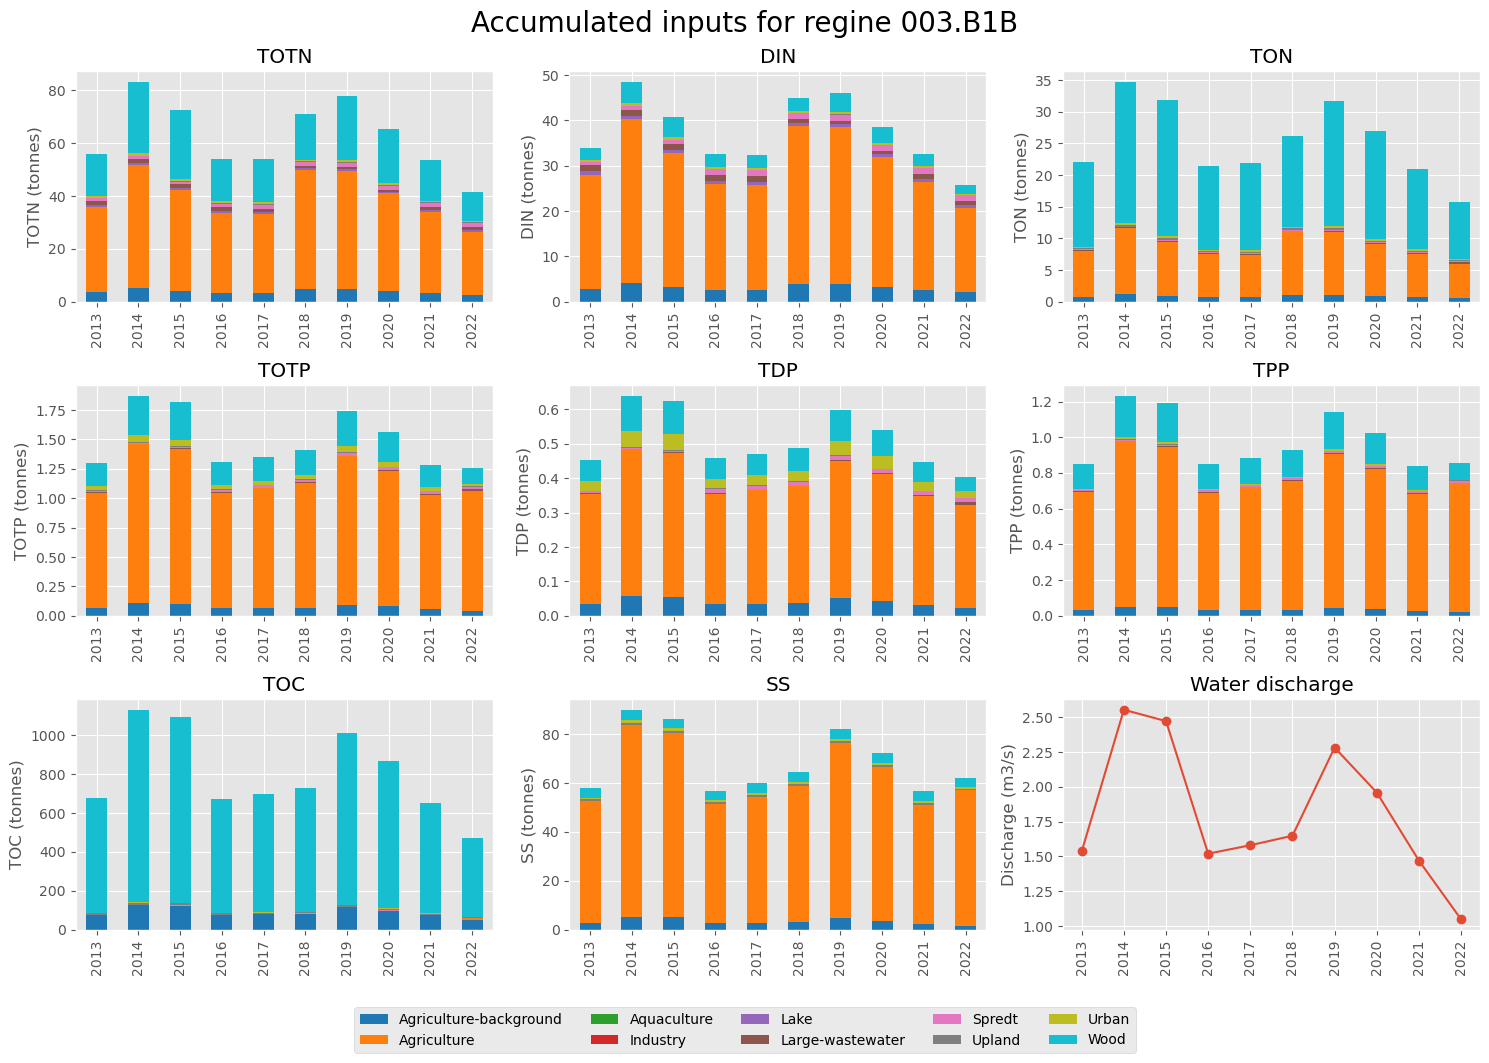

In [6]:
# Catchment of interest
reg_id = "003.B1B"

# Period of interest
st_yr, end_yr = 2017, 2022

# Parameter of interest
par = "TOTP"
ges_conc = 16  # ug/l

# Plot regine and all contributing regines upstream
gdf, ax = teo.vis.plot_catchment(
    g, reg_id, reg_gdf, id_col="regine", include_connected=True, direct="up"
)

res_dict = teo.model.get_avlastningsbehov(
    reg_id, par, ges_conc, mod_df, st_yr=st_yr, end_yr=end_yr, index_col="year"
)

axes = teo.vis.plot_regine_barchart(reg_id, mod_df, stat="accum", index_col="year")

**The modelled TOTP concentration of 28 ug/l agree well with monitored values from the lake, where mean TOTP concentrations from 2017 to 2022 are 30 ug/l** (see [Vann-Nett](https://vann-nett.no/portal/#/waterbody/003-295-L)). The estimated avlastningsbehov are also in-line with more detailed estimates from NIBIO.

Note, however, that there is also good monitoring data from the river about 2 km downstream of Sæbyvannet (at Svinna). Here, mean TOTP concentrations for the same period are 40 ug/l i.e. substantially higher than in the lake. It seems unlikely that enough TOTP enters the river between the Sæbyvannet outflow and the river monitoring site to explain this difference. Both sites have very good monitoring compared to most areas: between 2017 and 2022, there are 61 samples from Sæbyvannet and 152 from the river at Svinna. The flow volume from the lake outflow must be very similar to the volume at Svinna, so this implies either:

 1. There is a major source of TOTP just downstream of the lake (but I can't see anything on the map),
 2. The monitoring data is incompatible/not representative in some way.

For TOTN, the monitoring data are more compatible: between 2017 and 2022, mean concentrations in the lake are 1058 ug/l and in the river at Svinna they're 1153 ug/l. **TEOTIL simulates a mean concentration over this period of 1166 ug/l, which is again very close to the observed values**.